Unsupervised - Putri Apryanti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
flight = pd.read_csv('flight.csv')
flight.info()
print(flight.isnull().sum())
print(f"Jumlah baris duplikat: {flight.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629


Distribusi Kolom 'FFP_TIER'
FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64

Distribusi Kolom 'GENDER'
GENDER
Male      48134
Female    14851
Name: count, dtype: int64


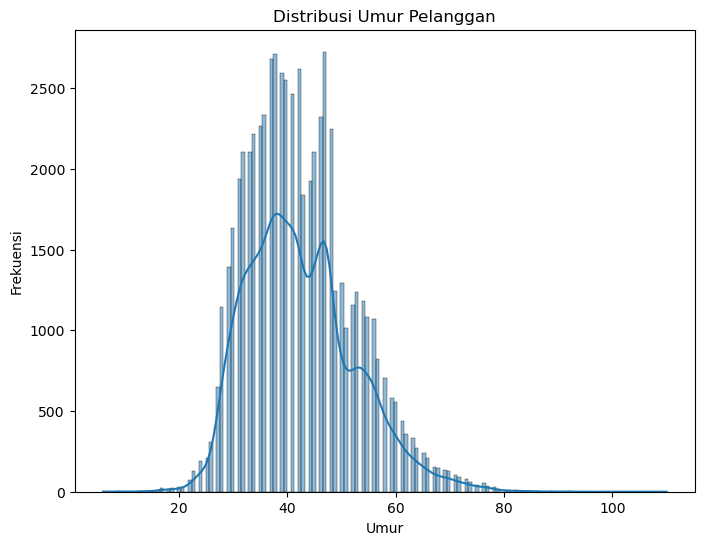

In [3]:
flight.describe()

## Statistik untuk Kolom Kategorikal (unique values)
print("\nDistribusi Kolom 'FFP_TIER'")
print(flight['FFP_TIER'].value_counts())

print("\nDistribusi Kolom 'GENDER'")
print(flight['GENDER'].value_counts())

# Contoh histogram untuk kolom 'AGE'
plt.figure(figsize=(8, 6))
sns.histplot(flight['AGE'], kde=True)
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()


Matriks Korelasi Antar Kolom Numerik
                SUM_YR_1  FLIGHT_COUNT  SEG_KM_SUM       AGE  EXCHANGE_COUNT
SUM_YR_1        1.000000      0.748032    0.804125  0.111815        0.488029
FLIGHT_COUNT    0.748032      1.000000    0.850411  0.073246        0.502501
SEG_KM_SUM      0.804125      0.850411    1.000000  0.087254        0.507819
AGE             0.111815      0.073246    0.087254  1.000000        0.029604
EXCHANGE_COUNT  0.488029      0.502501    0.507819  0.029604        1.000000


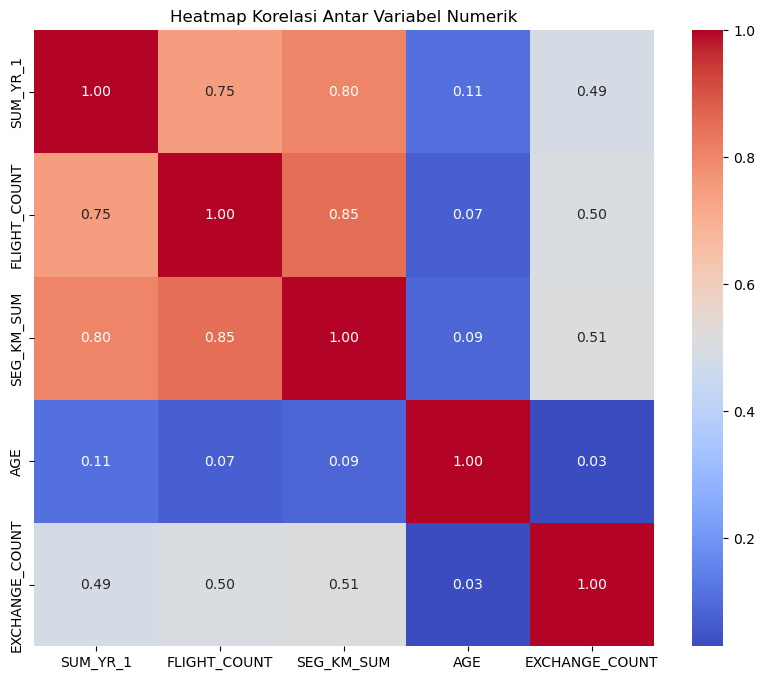

In [4]:
numeric_cols = ['SUM_YR_1', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AGE', 'EXCHANGE_COUNT']
correlation_matrix = flight[numeric_cols].corr()

print("\nMatriks Korelasi Antar Kolom Numerik")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

    first_flight_month  Total_Revenue  Total_Kilometers
0                    1    25630290.00          86052782
1                    2    23380503.00          76853996
2                    3    31860783.00         107714425
3                    4    31733065.00          99118742
4                    5    26457098.00          83392770
5                    6    26322622.29          84974877
6                    7    29085030.00          92325411
7                    8    28617251.00          89173347
8                    9    29168248.00          94365764
9                   10    27735103.00          88010737
10                  11    28405800.00          90596040
11                  12    25977822.00          86019980


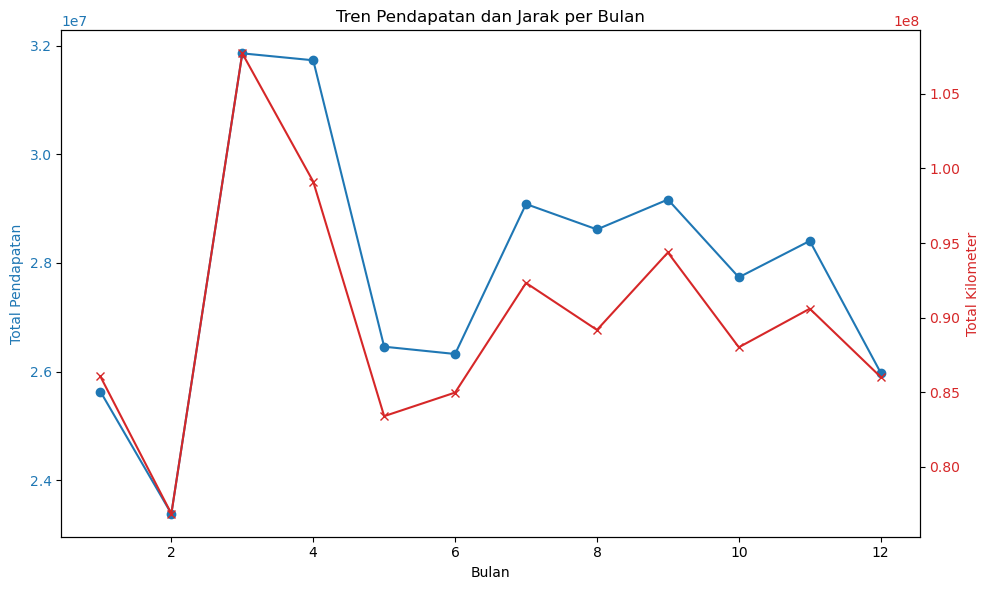

Berdasarkan analisis data, terdapat pola musiman yang jelas yaitu pendapatan dan jarak tempuh tertinggi terjadi di bulan Maret, April, dan Juli, sedangkan bulan Februari dan Mei cenderung menjadi periode yang lebih sepi.


In [5]:
### 1. Apakah terdapat pola musiman atau tren tertentu dalam total pendapatan dan total jarak penerbangan berdasarkan tanggal penerbangan pertama atau tanggal data diambil?

flight['FIRST_FLIGHT_DATE'] = pd.to_datetime(flight['FIRST_FLIGHT_DATE'])
flight['first_flight_month'] = flight['FIRST_FLIGHT_DATE'].dt.month
monthly_trend = flight.groupby('first_flight_month').agg(
    Total_Revenue=('SUM_YR_1', 'sum'),
    Total_Kilometers=('SEG_KM_SUM', 'sum')
).reset_index()
print(monthly_trend)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Total Pendapatan', color=color)
ax1.plot(monthly_trend['first_flight_month'], monthly_trend['Total_Revenue'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Kilometer', color=color)
ax2.plot(monthly_trend['first_flight_month'], monthly_trend['Total_Kilometers'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tren Pendapatan dan Jarak per Bulan')
fig.tight_layout()
plt.show()

print('Berdasarkan analisis data, terdapat pola musiman yang jelas yaitu pendapatan dan jarak tempuh tertinggi terjadi di bulan Maret, April, dan Juli, sedangkan bulan Februari dan Mei cenderung menjadi periode yang lebih sepi.')

  Interval_Category  Average_Flight_Count  Average_Revenue
0            Sering             18.922832      8581.964956
1            Normal             17.180008      7664.039470
2            Jarang              6.102239      2850.757790


C:\Users\PUTRI APRYANTI\AppData\Local\Temp\ipykernel_20512\1064009444.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_analysis = flight.groupby('Interval_Category').agg(


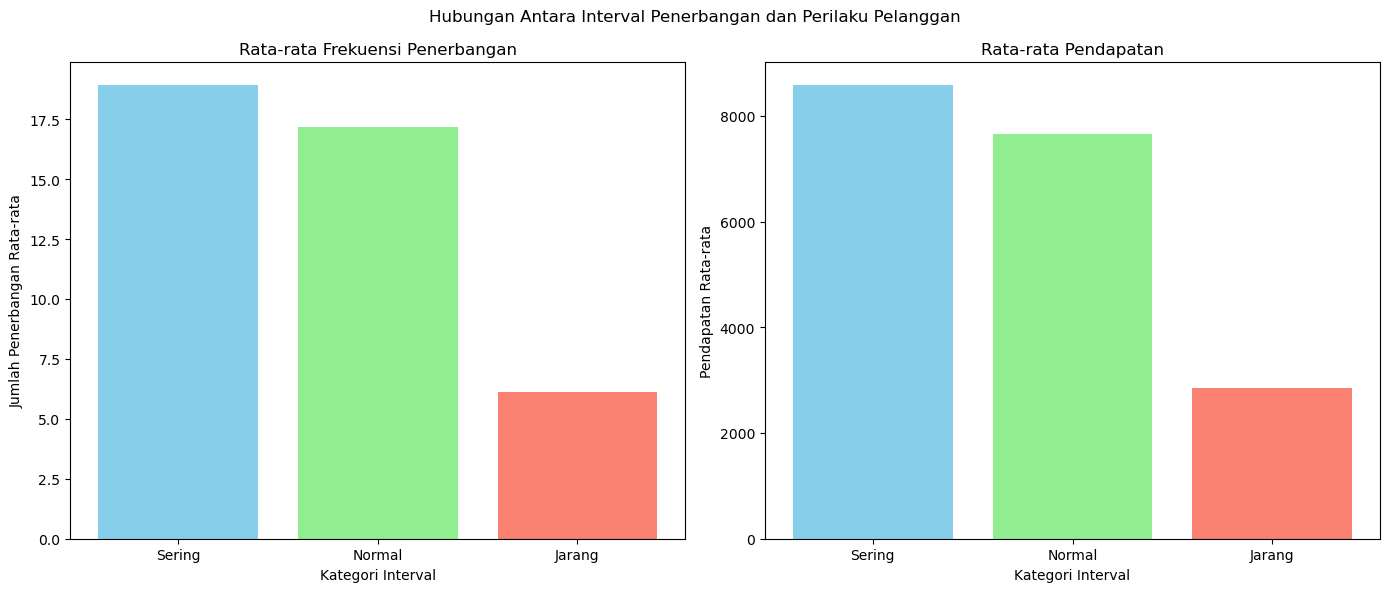

Hasil analisis menunjukkan adanya korelasi positif yang kuat antara seberapa sering pelanggan terbang (interval pendek) dengan kontribusi mereka terhadap pendapatan dan jumlah penerbangan.
Pelanggan dengan interval penerbangan yang lebih pendek adalah segmen paling berharga dan menjadi fokus utama untuk strategi retensi dan program loyalitas.


In [6]:
### 2. Bagaimana rata-rata interval antar penerbangan memengaruhi jumlah total penerbangan dan pendapatan yang dihasilkan oleh pelanggan?
bins = [0, 15, 45, np.inf]
labels = ['Sering', 'Normal', 'Jarang']
flight['Interval_Category'] = pd.cut(flight['AVG_INTERVAL'], bins=bins, labels=labels)
interval_analysis = flight.groupby('Interval_Category').agg(
    Average_Flight_Count=('FLIGHT_COUNT', 'mean'),
    Average_Revenue=('SUM_YR_1', 'mean')
).reset_index()
print(interval_analysis)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(interval_analysis['Interval_Category'], interval_analysis['Average_Flight_Count'], color=['skyblue', 'lightgreen', 'salmon'])
ax[0].set_title('Rata-rata Frekuensi Penerbangan')
ax[0].set_xlabel('Kategori Interval')
ax[0].set_ylabel('Jumlah Penerbangan Rata-rata')

ax[1].bar(interval_analysis['Interval_Category'], interval_analysis['Average_Revenue'], color=['skyblue', 'lightgreen', 'salmon'])
ax[1].set_title('Rata-rata Pendapatan')
ax[1].set_xlabel('Kategori Interval')
ax[1].set_ylabel('Pendapatan Rata-rata')

plt.suptitle('Hubungan Antara Interval Penerbangan dan Perilaku Pelanggan')
plt.tight_layout()
plt.show()

print('Hasil analisis menunjukkan adanya korelasi positif yang kuat antara seberapa sering pelanggan terbang (interval pendek) dengan kontribusi mereka terhadap pendapatan dan jumlah penerbangan.')
print('Pelanggan dengan interval penerbangan yang lebih pendek adalah segmen paling berharga dan menjadi fokus utama untuk strategi retensi dan program loyalitas.')

AGE               1.000000
FLIGHT_COUNT      0.073246
SEG_KM_SUM        0.087254
EXCHANGE_COUNT    0.029604
Name: AGE, dtype: float64


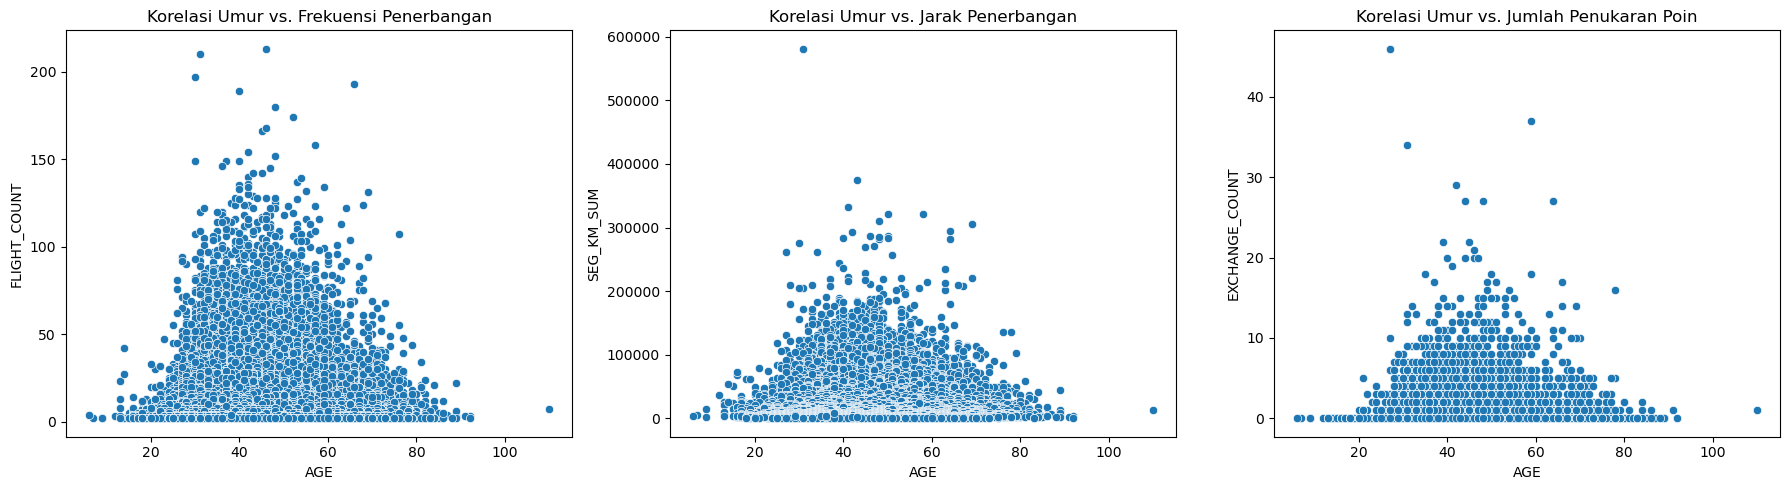

Berdasarkan data korelasi, umur pelanggan tidak memiliki hubungan yang kuat dengan frekuensi penerbangan, jarak tempuh, maupun jumlah penukaran poin. Ini menunjukkan bahwa usia bukanlah faktor utama untuk memprediksi perilaku penerbangan atau penggunaan poin, sehingga strategi pemasaran harus fokus pada indikator lain yang lebih relevan.


In [7]:
### 3. Adakah hubungan antara umur pelanggan dengan perilaku mereka, seperti frekuensi penerbangan, total jarak tempuh, dan jumlah penukaran poin?
age_correlation = flight[['AGE', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'EXCHANGE_COUNT']].corr().loc['AGE']
print(age_correlation)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='AGE', y='FLIGHT_COUNT', data=flight, ax=axes[0])
axes[0].set_title('Korelasi Umur vs. Frekuensi Penerbangan')

sns.scatterplot(x='AGE', y='SEG_KM_SUM', data=flight, ax=axes[1])
axes[1].set_title('Korelasi Umur vs. Jarak Penerbangan')

sns.scatterplot(x='AGE', y='EXCHANGE_COUNT', data=flight, ax=axes[2])
axes[2].set_title('Korelasi Umur vs. Jumlah Penukaran Poin')

plt.tight_layout()
plt.show()

print('Berdasarkan data korelasi, umur pelanggan tidak memiliki hubungan yang kuat dengan frekuensi penerbangan, jarak tempuh, maupun jumlah penukaran poin. Ini menunjukkan bahwa usia bukanlah faktor utama untuk memprediksi perilaku penerbangan atau penggunaan poin, sehingga strategi pemasaran harus fokus pada indikator lain yang lebih relevan.')

Rata-rata Poin Tidak Terpakai berdasarkan FFP_TIER:
   FFP_TIER  Point_NotFlight
0         4         2.328196
1         5         6.545615
2         6         9.476537


Rata-rata Poin Tidak Terpakai berdasarkan GENDER:
   GENDER  Point_NotFlight
0  Female         2.696519
1    Male         2.738023


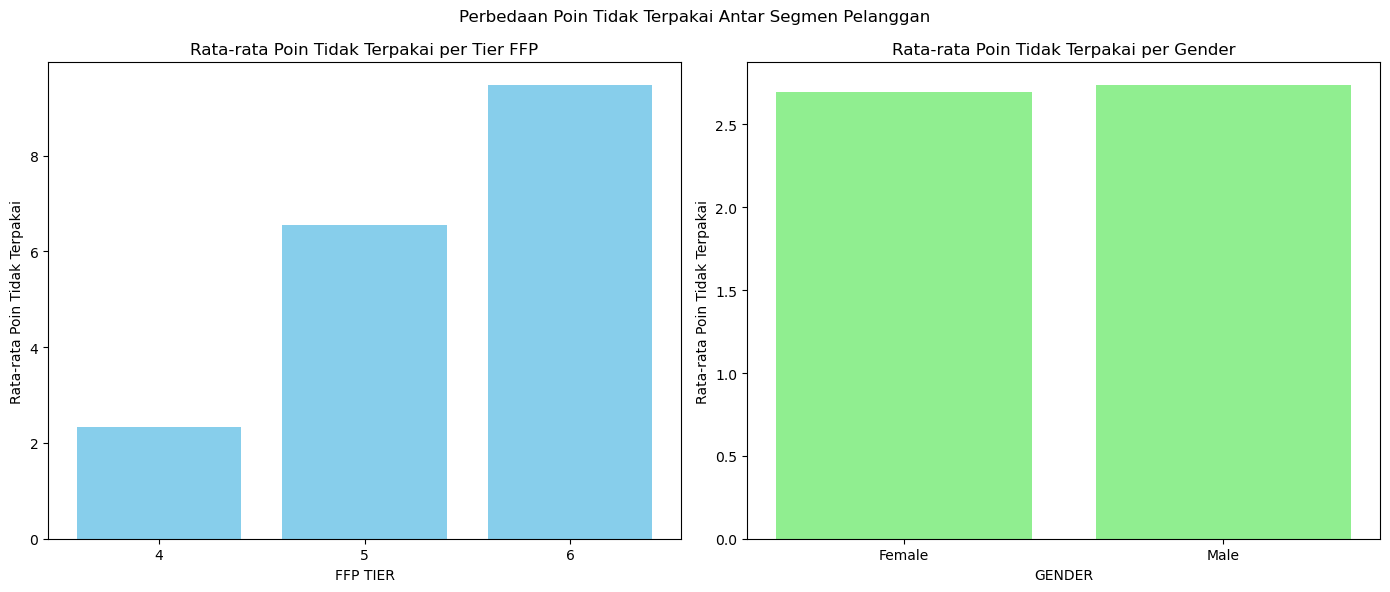

Berdasarkan hasil analisis, ada perbedaan signifikan dalam poin yang tidak terpakai antar tingkatan FFP. Pelanggan dengan FFP_TIER lebih tinggi memiliki rata-rata poin menganggur yang jauh lebih besar, menunjukkan bahwa mereka mengumpulkan banyak poin tetapi tidak menukarkannya secara proporsional. Sementara itu, tidak ada perbedaan signifikan dalam perilaku penukaran poin antara gender Male dan Female.


In [8]:
### 4. Apakah ada perbedaan signifikan dalam jumlah poin yang tidak digunakan antar segmen pelanggan (misalnya, berdasarkan FFP_TIER, GENDER, atau WORK_COUNTRY)?
unspent_points_tier = flight.groupby('FFP_TIER')['Point_NotFlight'].mean().reset_index()
print("Rata-rata Poin Tidak Terpakai berdasarkan FFP_TIER:")
print(unspent_points_tier)
print("\n")

unspent_points_gender = flight.groupby('GENDER')['Point_NotFlight'].mean().reset_index()
print("Rata-rata Poin Tidak Terpakai berdasarkan GENDER:")
print(unspent_points_gender)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(unspent_points_tier['FFP_TIER'].astype(str), unspent_points_tier['Point_NotFlight'], color='skyblue')
ax[0].set_title('Rata-rata Poin Tidak Terpakai per Tier FFP')
ax[0].set_xlabel('FFP TIER')
ax[0].set_ylabel('Rata-rata Poin Tidak Terpakai')

ax[1].bar(unspent_points_gender['GENDER'], unspent_points_gender['Point_NotFlight'], color='lightgreen')
ax[1].set_title('Rata-rata Poin Tidak Terpakai per Gender')
ax[1].set_xlabel('GENDER')
ax[1].set_ylabel('Rata-rata Poin Tidak Terpakai')

plt.suptitle('Perbedaan Poin Tidak Terpakai Antar Segmen Pelanggan')
plt.tight_layout()
plt.show()

print('Berdasarkan hasil analisis, ada perbedaan signifikan dalam poin yang tidak terpakai antar tingkatan FFP. Pelanggan dengan FFP_TIER lebih tinggi memiliki rata-rata poin menganggur yang jauh lebih besar, menunjukkan bahwa mereka mengumpulkan banyak poin tetapi tidak menukarkannya secara proporsional. Sementara itu, tidak ada perbedaan signifikan dalam perilaku penukaran poin antara gender Male dan Female.')


                EXCHANGE_COUNT  SEG_KM_SUM  Points_Sum
EXCHANGE_COUNT        1.000000    0.507819    0.578581
SEG_KM_SUM            0.507819    1.000000    0.853014
Points_Sum            0.578581    0.853014    1.000000


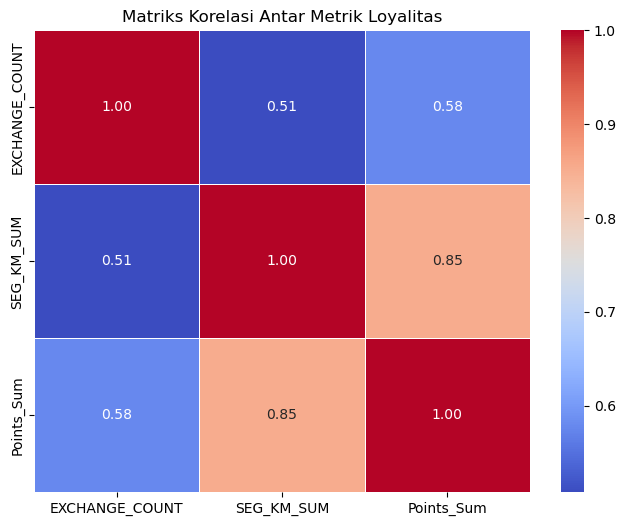

Berdasarkan hasil korelasi, ada hubungan positif yang kuat antara jarak penerbangan, jumlah poin yang dikumpulkan, dan frekuensi penukaran poin. Ini menunjukkan bahwa program loyalitas efektif karena pelanggan yang paling aktif terbang juga merupakan yang paling sering mengumpulkan dan menukarkan poin.


In [15]:
### 5. Bagaimana korelasi antara jumlah penukaran dengan total jarak penerbangan dan jumlah poin yang didapat?
exchange_correlation = flight[['EXCHANGE_COUNT', 'SEG_KM_SUM', 'Points_Sum']].corr()
print(exchange_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(exchange_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Antar Metrik Loyalitas')
plt.show()

print('Berdasarkan hasil korelasi, ada hubungan positif yang kuat antara jarak penerbangan, jumlah poin yang dikumpulkan, dan frekuensi penukaran poin. Ini menunjukkan bahwa program loyalitas efektif karena pelanggan yang paling aktif terbang juga merupakan yang paling sering mengumpulkan dan menukarkan poin.')

Fitur ini untuk mengelompokkan pelanggan berdasarkan jenis perjalanan, bukan hanya jumlahnya.


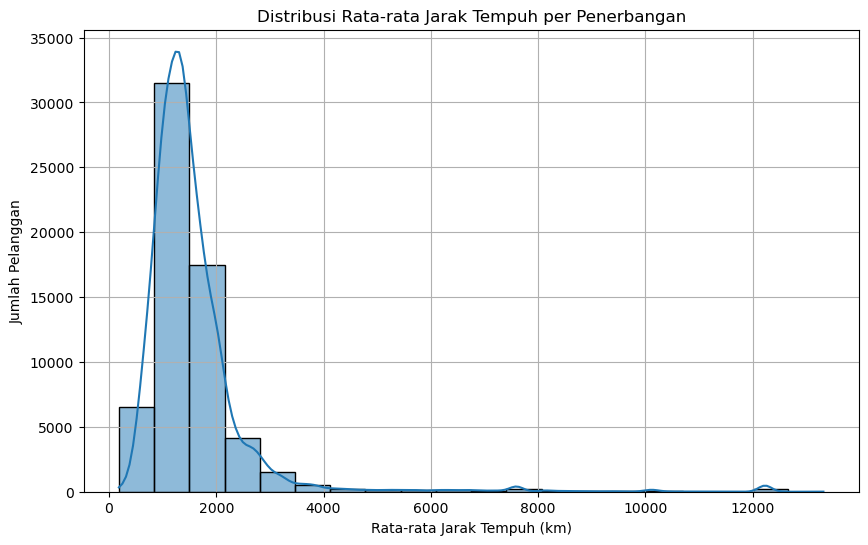


DataFrame dengan fituruntuk Clustering:
       FFP_TIER_ENCODED  FLIGHT_COUNT  SEG_KM_SUM  Points_Sum  EXCHANGE_COUNT  \
0                     2           210      580717      619760              34   
1                     2           140      293678      415768              29   
2                     2           135      283712      406361              20   
3                     1            23      281336      372204              11   
4                     2           152      309928      338813              27   
...                 ...           ...         ...         ...             ...   
62983                 0             2        1134       12318               1   
62984                 0             4        8016      106972              14   
62985                 0             2        2594           0               0   
62986                 0             2        3934           0               0   
62987                 0             2        4222           0       

In [17]:
# Membuat fitur baru: Rata-rata jarak tempuh per penerbangan
flight['AVG_DISTANCE_PER_FLIGHT'] = flight['SEG_KM_SUM'] / flight['FLIGHT_COUNT']
print('Fitur ini untuk mengelompokkan pelanggan berdasarkan jenis perjalanan, bukan hanya jumlahnya.')

plt.figure(figsize=(10, 6))
sns.histplot(data=flight, x='AVG_DISTANCE_PER_FLIGHT', kde=True, bins=20)
plt.title('Distribusi Rata-rata Jarak Tempuh per Penerbangan')
plt.xlabel('Rata-rata Jarak Tempuh (km)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

# Mengubah fitur kategorikal (FFP_TIER) menjadi numerik
le = LabelEncoder()
flight['FFP_TIER_ENCODED'] = le.fit_transform(flight['FFP_TIER'])

# Memilih fitur-fitur final untuk clustering
clustering_features = [
    'FFP_TIER_ENCODED',
    'FLIGHT_COUNT',
    'SEG_KM_SUM',
    'Points_Sum',
    'EXCHANGE_COUNT',
    'AVG_DISTANCE_PER_FLIGHT'
]

# ==============================================================================
# Alasan Pemilihan Fitur untuk Clustering:
# 1. FLIGHT_COUNT: Mengukur frekuensi pelanggan terbang (konsep Frequency dalam RFM).
# 2. SEG_KM_SUM: Mengukur total jarak tempuh, berkorelasi dengan nilai tiket (konsep Monetary).
# 3. Points_Sum: Indikator seberapa banyak poin loyalitas yang dikumpulkan.
# 4. EXCHANGE_COUNT: Indikator seberapa aktif pelanggan menukarkan poin.
# 5. FFP_TIER: Tingkat keanggotaan, yang mencerminkan loyalitas pelanggan.
# Fitur-fitur ini dipilih karena mampu membedakan perilaku dan nilai pelanggan.
# ==============================================================================

flight_clustering = flight[clustering_features]
print("\nDataFrame dengan fituruntuk Clustering:")
print(flight_clustering)

# Melakukan Standarisasi (Scaling) pada semua fitur
scaler = StandardScaler()
flight_scaled = scaler.fit_transform(flight_clustering)

# Mengembalikan hasil scaling ke dalam DataFrame
flight_scaled = pd.DataFrame(flight_scaled, columns=flight_clustering.columns)
print("\nDataFrame setelah Standarisasi:")
print(flight_scaled)

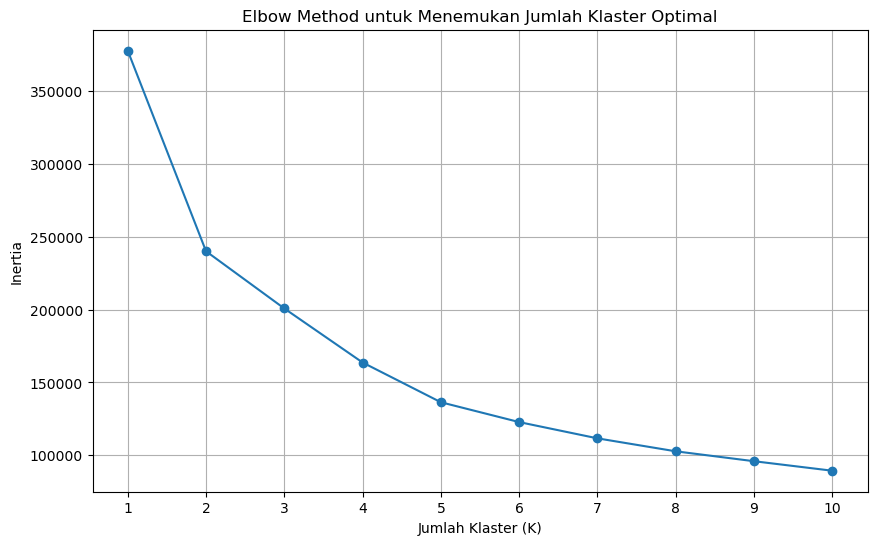

In [18]:
# Mencari Jumlah Klaster Optimal dengan Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(flight_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method untuk Menemukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


Silhouette Score: 0.71


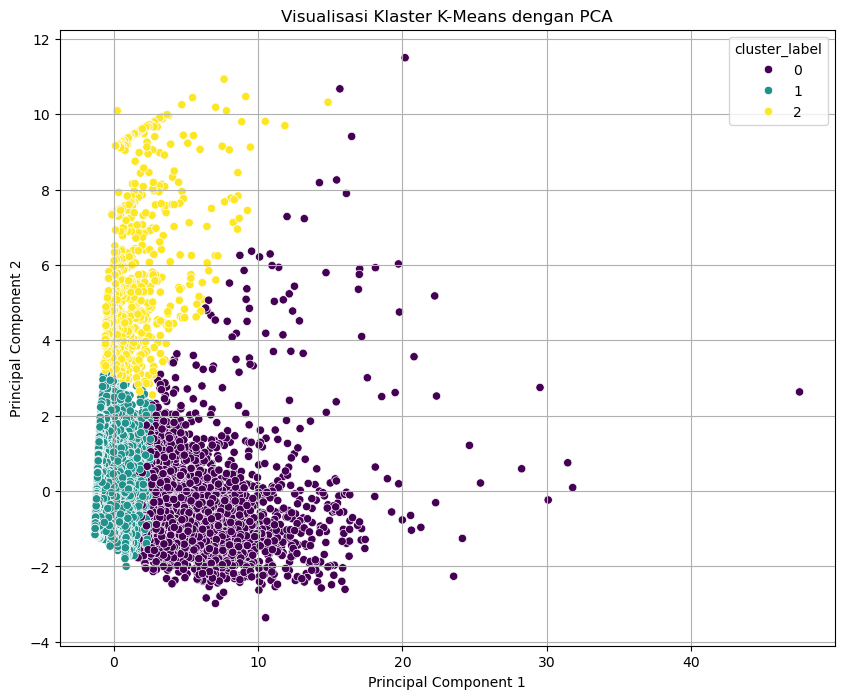

In [19]:
# Melakukan Clustering Menggunakan K-Means
optimal_clusters = 3 # Misal, dari grafik elbow
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_final.fit(flight_scaled)
flight['cluster_label'] = kmeans_final.labels_

# Evaluasi Klaster dengan Visualisasi dan Silhouette Score
silhouette_avg = silhouette_score(flight_scaled, kmeans_final.labels_)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(flight_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster_label'] = kmeans_final.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=pca_df, palette='viridis', legend='full')
plt.title('Visualisasi Klaster K-Means dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [20]:
cluster_summary = flight.groupby('cluster_label').agg({
    'FLIGHT_COUNT': 'mean',
    'SEG_KM_SUM': 'mean',
    'Points_Sum': 'mean',
    'EXCHANGE_COUNT': 'mean',
    'FFP_TIER': lambda x: x.mode()[0], 
    'AVG_DISTANCE_PER_FLIGHT': 'mean'
}).round(2)

print("Statistik Rata-rata Fitur per Klaster:")
print(cluster_summary)

Statistik Rata-rata Fitur per Klaster:
               FLIGHT_COUNT  SEG_KM_SUM  Points_Sum  EXCHANGE_COUNT  FFP_TIER  \
cluster_label                                                                   
0                     46.26    64617.32    57358.06            2.20         5   
1                      8.90    12445.48     8268.25            0.15         4   
2                      5.19    41084.21    27809.96            0.31         4   

               AVG_DISTANCE_PER_FLIGHT  
cluster_label                           
0                              1494.81  
1                              1461.28  
2                              8349.17  


In [14]:
# ==============================================================================
# Interpretasi dan Rekomendasi Bisnis dari Hasil Klaster
# ==============================================================================

print("\nBerdasarkan statistik rata-rata fitur per klaster, kita dapat mengidentifikasi tiga profil pelanggan yang berbeda.\n")

print("----------------------------------------------------------------------")
print("### Klaster 0: Pelanggan Elit & Super Loyal")
print("----------------------------------------------------------------------")
print("Interpretasi:")
print("- Klaster ini adalah pelanggan paling bernilai.")
print("- Mereka terbang sangat sering (rata-rata FLIGHT_COUNT 46.26), mengumpulkan poin dalam jumlah besar (Points_Sum 57358.06), dan berada di FFP_TIER tertinggi (5).")
print("- Rata-rata jarak per penerbangan (AVG_DISTANCE_PER_FLIGHT) menunjukkan perpaduan pelancong domestik dan internasional yang sangat aktif.")
print("\nRekomendasi Bisnis:")
print("1. Retensi Eksklusif: Fokus pada mempertahankan loyalitas mereka dengan layanan premium yang dipersonalisasi.")
print("   Contoh: Tawarkan upgrade otomatis, akses lounge, atau hadiah eksklusif.")
print("2. Penggunaan Poin Bernilai: Dorong mereka untuk menukarkan poin yang menumpuk dengan penawaran aspirasional seperti pengalaman mewah atau paket liburan eksklusif.")

print("\n----------------------------------------------------------------------")
print("### Klaster 1: Pelanggan Rendah-Engagement")
print("----------------------------------------------------------------------")
print("Interpretasi:")
print("- Ini adalah kelompok pelanggan dengan aktivitas paling rendah.")
print("- Mereka jarang terbang (FLIGHT_COUNT 8.90) dan memiliki metrik loyalitas (Points_Sum & EXCHANGE_COUNT) yang sangat minimal.")
print("- Mereka kemungkinan adalah pelanggan baru atau yang tidak peduli dengan program loyalitas.")
print("\nRekomendasi Bisnis:")
print("1. Kampanye Aktivasi: Targetkan klaster ini dengan promosi tiket yang menarik atau penawaran khusus untuk penerbangan berikutnya.")
print("2. Edukasi Manfaat: Tingkatkan kesadaran mereka tentang program loyalitas melalui komunikasi yang sederhana dan insentif poin tambahan.")

print("\n----------------------------------------------------------------------")
print("### Klaster 2: Pelanggan Jarak Jauh dengan Poin Menganggur")
print("----------------------------------------------------------------------")
print("Interpretasi:")
print("- Klaster ini unik dan bernilai tinggi meskipun jarang terbang.")
print("- Mereka terbang sangat jarang (FLIGHT_COUNT 5.19), tetapi rata-rata jarak per penerbangannya sangat jauh (AVG_DISTANCE_PER_FLIGHT 8349.17).")
print("- Mereka mengumpulkan banyak poin dari sedikit penerbangan ini, namun sangat jarang menukarkannya (EXCHANGE_COUNT 0.31).")
print("\nRekomendasi Bisnis:")
print("1. Insentif Penukaran Poin: Dorong mereka untuk menggunakan poin yang menganggur dengan penawaran penukaran yang relevan dengan profil mereka, seperti upgrade kelas bisnis untuk penerbangan internasional.")
print("2. Komunikasi Aspirational: Kirimkan materi promosi yang menyoroti destinasi eksotis atau pengalaman perjalanan yang bisa dicapai dengan jumlah poin yang mereka miliki.")
print("----------------------------------------------------------------------")


Berdasarkan statistik rata-rata fitur per klaster, kita dapat mengidentifikasi tiga profil pelanggan yang berbeda.

----------------------------------------------------------------------
### Klaster 0: Pelanggan Elit & Super Loyal
----------------------------------------------------------------------
Interpretasi:
- Klaster ini adalah pelanggan paling bernilai.
- Mereka terbang sangat sering (rata-rata FLIGHT_COUNT 46.26), mengumpulkan poin dalam jumlah besar (Points_Sum 57358.06), dan berada di FFP_TIER tertinggi (5).
- Rata-rata jarak per penerbangan (AVG_DISTANCE_PER_FLIGHT) menunjukkan perpaduan pelancong domestik dan internasional yang sangat aktif.

Rekomendasi Bisnis:
1. Retensi Eksklusif: Fokus pada mempertahankan loyalitas mereka dengan layanan premium yang dipersonalisasi.
   Contoh: Tawarkan upgrade otomatis, akses lounge, atau hadiah eksklusif.
2. Penggunaan Poin Bernilai: Dorong mereka untuk menukarkan poin yang menumpuk dengan penawaran aspirasional seperti pengalaman me